In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [41]:
hub_nash=pd.read_csv('../class_data/hub_requests.csv')

/Users/nicolemuldowney/opt/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
hub_nash.head()

Request #  Status                Request Type  \
0     113016  Closed   Trash, Recycling & Litter   
1     126185  Closed  Streets, Roads & Sidewalks   
2     119344  Closed   Trash, Recycling & Litter   
3     127752  Closed   Trash, Recycling & Litter   
4     113477  Closed   Trash, Recycling & Litter   

                     Subrequest Type            Additional Subrequest Type  \
0                       Cart Service    Trash - Request an Additional Cart   
1          Blocking the Right of Way                                   NaN   
2                 Damage to Property                         Trash Service   
3       New Service/Activate Service  New Construction Residential Recycle   
4  Backdoor Trash or Recycle Waivers   Request Recycling Disability Waiver   

       Date / Time Opened      Date / Time Closed Request Origin  \
0  10/30/2018 01:47:00 PM  03/05/2019 09:35:00 PM          Phone   
1  12/28/2018 01:04:00 PM  12/28/2018 01:04:00 PM          Phone   
2  11/27/2018 02:20:00 PM  11/29/2018 04:04:00 AM          Phone   
3  01/03/2019 06:57:00 PM  01/09/2019 10:09:00 AM          Phone   
4  10/31/2018 12:20:00 PM  10/31/2018 04:10:00 PM          Phone   

            System of Origin ID Contact Type  ...  State Issue  \
0                           NaN          NaN  ...        False   
1  OE-00040610_12/27/2018 15:44          NaN  ...        False   
2                           NaN          NaN  ...        False   
3                           NaN          NaN  ...        False   
4                           NaN          NaN  ...        False   

   Parent Request  Closed When Created  \
0             NaN                False   
1             NaN                 True   
2             NaN                 True   
3             NaN                False   
4             NaN                 True   

                                             Address       City  \
0                                     2009 Upland Dr  NASHVILLE   
1                        ELM HILL PKE / DONELSON PKE  NASHVILLE   
2  597 Westchester Dr, Nashville, TN 37115, Unite...    MADISON   
3                                        Ruffian Way        NaN   
4  2326 Smith Springs Rd, Nashville, TN 37217, Un...  NASHVILLE   

  Council District    ZIP   Latitude  Longitude             Mapped Location  
0              7.0  37216  36.198638 -86.706659   (36.1986378, -86.7066586)  
1             15.0  37214  36.148809 -86.666282  (36.14880891, -86.6662816)  
2              8.0  37115  36.263020 -86.738630       (36.26302, -86.73863)  
3              NaN    NaN  38.097609 -84.554097   (38.0976091, -84.5540971)  
4             29.0  37217  36.096460 -86.637440       (36.09646, -86.63744)  

[5 rows x 21 columns]

In [43]:
hub_nash['Council District'].value_counts()

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [44]:
hub_nash_drop=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [45]:
#hub_nash = hub_nash[["Council District", "Request Type"]]

In [46]:
hub_nash_drop.head()

Request #  Status                Request Type  \
0     113016  Closed   Trash, Recycling & Litter   
1     126185  Closed  Streets, Roads & Sidewalks   
2     119344  Closed   Trash, Recycling & Litter   
3     127752  Closed   Trash, Recycling & Litter   
4     113477  Closed   Trash, Recycling & Litter   

                     Subrequest Type            Additional Subrequest Type  \
0                       Cart Service    Trash - Request an Additional Cart   
1          Blocking the Right of Way                                   NaN   
2                 Damage to Property                         Trash Service   
3       New Service/Activate Service  New Construction Residential Recycle   
4  Backdoor Trash or Recycle Waivers   Request Recycling Disability Waiver   

       Date / Time Opened      Date / Time Closed Request Origin  \
0  10/30/2018 01:47:00 PM  03/05/2019 09:35:00 PM          Phone   
1  12/28/2018 01:04:00 PM  12/28/2018 01:04:00 PM          Phone   
2  11/27/2018 02:20:00 PM  11/29/2018 04:04:00 AM          Phone   
3  01/03/2019 06:57:00 PM  01/09/2019 10:09:00 AM          Phone   
4  10/31/2018 12:20:00 PM  10/31/2018 04:10:00 PM          Phone   

            System of Origin ID Contact Type  Parent Request  \
0                           NaN          NaN             NaN   
1  OE-00040610_12/27/2018 15:44          NaN             NaN   
2                           NaN          NaN             NaN   
3                           NaN          NaN             NaN   
4                           NaN          NaN             NaN   

   Closed When Created                                            Address  \
0                False                                     2009 Upland Dr   
1                 True                        ELM HILL PKE / DONELSON PKE   
2                 True  597 Westchester Dr, Nashville, TN 37115, Unite...   
3                False                                        Ruffian Way   
4                 True  2326 Smith Springs Rd, Nashville, TN 37217, Un...   

        City  Council District    ZIP   Latitude  Longitude  
0  NASHVILLE               7.0  37216  36.198638 -86.706659  
1  NASHVILLE              15.0  37214  36.148809 -86.666282  
2    MADISON               8.0  37115  36.263020 -86.738630  
3        NaN               NaN    NaN  38.097609 -84.554097  
4  NASHVILLE              29.0  37217  36.096460 -86.637440

In [47]:
clean_hub_nash=hub_nash_drop.dropna(subset=['Council District'])

In [48]:
council_count=clean_hub_nash['Council District'].value_counts()
council_count

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [49]:
council_hub_nash=clean_hub_nash.groupby(['Council District']).count()
council_hub_nash.head()

Request #  Status  Request Type  Subrequest Type  \
Council District                                                     
1.0                    7106    7106          7105             7064   
2.0                   10750   10750         10749            10699   
3.0                    5766    5766          5765             5741   
4.0                    4598    4598          4582             4562   
5.0                   12846   12846         12844            12792   

                  Additional Subrequest Type  Date / Time Opened  \
Council District                                                   
1.0                                     4330                7106   
2.0                                     7261               10750   
3.0                                     2779                5766   
4.0                                     2857                4598   
5.0                                     8593               12846   

                  Date / Time Closed  Request Origin  System of Origin ID  \
Council District                                                            
1.0                             6882            7106                  753   
2.0                            10421           10750                  706   
3.0                             5565            5766                  918   
4.0                             4482            4598                  438   
5.0                            12383           12846                  990   

                  Contact Type  Parent Request  Closed When Created  Address  \
Council District                                                               
1.0                        639              59                 7106     7095   
2.0                        822             121                10750    10735   
3.0                        386              74                 5766     5761   
4.0                        506             101                 4598     4585   
5.0                       1048             204                12846    12827   

                   City    ZIP  Latitude  Longitude  
Council District                                     
1.0                7103   7102      7097       7097  
2.0               10746  10737     10739      10739  
3.0                5762   5754      5762       5762  
4.0                4597   4596      4595       4595  
5.0               12841  12838     12835      12835

-Request vs location (council district, has someone to push for resolution, an accountable person)
-How requests vary by council district - are there spikes in certain places or times, does that tell us if particular council members are pushing hub more actively than others?
-Break covid data out - look for trends by council district
-Look for trends in type of requests, does a particular district stand out for certain categories?

In [50]:
covid = clean_hub_nash.loc[clean_hub_nash['Request Type'] == 'COVID-19']
covid  #2689 rows

Request #  Status Request Type      Subrequest Type  \
1516       330630  Closed     COVID-19                  NaN   
4562       339424  Closed     COVID-19  COVID-19 Violations   
4971       348304  Closed     COVID-19  COVID-19 Violations   
24756      339754  Closed     COVID-19  COVID-19 Violations   
28885      339739  Closed     COVID-19  COVID-19 Violations   
...           ...     ...          ...                  ...   
144615     364612  Closed     COVID-19   COVID-19 Questions   
144619     364785     New     COVID-19  COVID-19 Violations   
144630     364796  Closed     COVID-19  COVID-19 Violations   
144640     364714     New     COVID-19  COVID-19 Violations   
144642     364664     New     COVID-19  COVID-19 Violations   

       Additional Subrequest Type      Date / Time Opened  \
1516                          NaN  03/22/2020 05:12:15 PM   
4562          COVID-19 Violations  04/04/2020 08:18:05 PM   
4971                          NaN  04/17/2020 09:30:20 PM   
24756         COVID-19 Violations  04/06/2020 12:24:53 AM   
28885         COVID-19 Violations  04/05/2020 11:32:46 PM   
...                           ...                     ...   
144615                        NaN  05/11/2020 08:45:37 PM   
144619        COVID-19 Violations  05/12/2020 03:09:47 AM   
144630        COVID-19 Violations  05/12/2020 04:13:48 AM   
144640        COVID-19 Violations  05/11/2020 10:10:07 PM   
144642        COVID-19 Violations  05/11/2020 09:19:54 PM   

            Date / Time Closed          Request Origin System of Origin ID  \
1516    03/23/2020 01:20:48 AM  hubNashville Community                 NaN   
4562    04/09/2020 02:20:19 PM  hubNashville Community                 NaN   
4971    04/21/2020 02:07:48 PM  hubNashville Community                 NaN   
24756   04/13/2020 01:30:08 PM  hubNashville Community                 NaN   
28885   04/13/2020 01:56:44 PM  hubNashville Community                 NaN   
...                        ...                     ...                 ...   
144615  05/12/2020 01:18:57 PM                   Phone                 NaN   
144619                     NaN  hubNashville Community                 NaN   
144630  05/12/2020 05:00:58 PM  hubNashville Community                 NaN   
144640                     NaN  hubNashville Community                 NaN   
144642                     NaN                   Phone                 NaN   

       Contact Type  Parent Request  Closed When Created  \
1516            NaN             NaN                False   
4562            NaN             NaN                False   
4971            NaN             NaN                False   
24756           NaN             NaN                False   
28885           NaN             NaN                False   
...             ...             ...                  ...   
144615          NaN             NaN                False   
144619          NaN             NaN                False   
144630          NaN             NaN                False   
144640          NaN             NaN                False   
144642          NaN             NaN                False   

                        Address       City  Council District    ZIP  \
1516     1400 Rosa L Parks Blvd  NASHVILLE              19.0  37208   
4562                800 Main St  NASHVILLE               6.0  37206   
4971          130 LifeWay Plaza  NASHVILLE              19.0  37203   
24756     5504 Old Hickory Blvd  HERMITAGE              12.0  37076   
28885            301 14th Ave N  NASHVILLE              19.0  37203   
...                         ...        ...               ...    ...   
144615           803 Ashlawn Pl  NASHVILLE              27.0  37211   
144619            800 Monroe St  NASHVILLE              19.0  37208   
144630  2215 N Gallatin Pike Rd    MADISON              10.0  37115   
144640            2934 Sidco Dr  NASHVILLE              16.0  37204   
144642      4816 Charlotte Pike  NASHVILLE              24.0  37209   

       

In [51]:
covid['Subrequest Type'].value_counts()

COVID-19 Violations                                           2508
COVID-19 Questions                                             174
COVID-19 - Submit Input about The Plan to Reopen Nashville       4
Name: Subrequest Type, dtype: int64

In [52]:
covid['Additional Subrequest Type'].value_counts()

COVID-19 Violations                                           2453
COVID-19 - Submit Input about The Plan to Reopen Nashville       3
Name: Additional Subrequest Type, dtype: int64

In [53]:
covid['Council District'].value_counts()

19.0    370
17.0    172
10.0    130
24.0    110
2.0     102
16.0    101
21.0    101
9.0     100
15.0     99
11.0     98
5.0      96
20.0     94
8.0      82
13.0     76
28.0     74
22.0     73
25.0     70
14.0     63
32.0     62
26.0     57
7.0      52
35.0     52
6.0      51
18.0     50
27.0     49
3.0      44
31.0     40
30.0     38
33.0     34
1.0      31
34.0     29
23.0     27
29.0     26
4.0      23
12.0     13
Name: Council District, dtype: int64

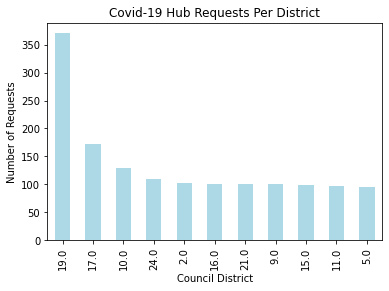

In [54]:
covid['Council District'].value_counts()[:5].plot(kind='bar',color='lightblue')
plt.ylabel('Number of Requests')
plt.xlabel('Council District')
plt.title('Covid-19 Hub Requests Per District'); 

In [59]:
covid['geometry'] = covid.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
covid.head(3)

/Users/nicolemuldowney/opt/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Request #  Status Request Type      Subrequest Type  \
1516     330630  Closed     COVID-19                  NaN   
4562     339424  Closed     COVID-19  COVID-19 Violations   
4971     348304  Closed     COVID-19  COVID-19 Violations   

     Additional Subrequest Type      Date / Time Opened  \
1516                        NaN  03/22/2020 05:12:15 PM   
4562        COVID-19 Violations  04/04/2020 08:18:05 PM   
4971                        NaN  04/17/2020 09:30:20 PM   

          Date / Time Closed          Request Origin System of Origin ID  \
1516  03/23/2020 01:20:48 AM  hubNashville Community                 NaN   
4562  04/09/2020 02:20:19 PM  hubNashville Community                 NaN   
4971  04/21/2020 02:07:48 PM  hubNashville Community                 NaN   

     Contact Type  Parent Request  Closed When Created  \
1516          NaN             NaN                False   
4562          NaN             NaN                False   
4971          NaN             NaN                False   

                     Address       City  Council District    ZIP   Latitude  \
1516  1400 Rosa L Parks Blvd  NASHVILLE              19.0  37208  36.178773   
4562             800 Main St  NASHVILLE               6.0  37206  36.175009   
4971       130 LifeWay Plaza  NASHVILLE              19.0  37203  36.165020   

      Longitude                                     geometry  
1516 -86.794311  POINT (-86.79431099325409 36.1787729116136)  
4562 -86.758545   POINT (-86.75854459325407 36.175009161612)  
4971 -86.789680                   POINT (-86.78968 36.16502)

In [71]:
nash_map = folium.Map(location =  [36.1612,-86.7775], zoom_start = 12)

#folium.GeoJson(polygon37207).add_to(map_37207)


for row_index, row_values in covid.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Request Type'])
    marker = folium.Marker(
        location = loc, 
        popup = pop,
        icon=folium.Icon(color='lightred', icon='hand-stop-o',prefix='fa')
    ) 
    marker.add_to(nash_map)
#nash_map.save('../maps/map37207.html')
nash_map

In [76]:
cluster_map_covid = folium.Map(location = [36.1612,-86.7775], zoom_start = 11)
marker_cluster = MarkerCluster().add_to(cluster_map_covid)
#folium.GeoJson(polygon_nashville).add_to(cluster_map_nash)

for row_index, row_values in covid.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = "Request Type: " + str(row_values['Request Type']) + " - Subrequest Type: " + str(row_values[ 'Subrequest Type']) + "- Additional Subrequest Type: " + str(row_values[ 'Additional Subrequest Type'])
    marker = folium.Marker(
        location = loc, 
        popup = '<strong>' + pop + '</strong>',
        icon=folium.Icon(color='lightred', icon='hand-stop-o',prefix='fa') )
    marker.add_to(marker_cluster)

#cluster_map_nash.save('../geospatial-explore/maps/clusternash.html')
cluster_map_covid  